In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:

HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240328_NBFF_GRU_Final/n=3 max_epochs=1500 seed=0/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)


path_GRU_Sweep = pathTT + "20240402_NBFF_SAE_GRU_RNN_DT_Seed2/"
subfolders_GRU = [f.path for f in os.scandir(path_GRU_Sweep) if f.is_dir()]

path_Vanilla_Sweep = pathTT + "20240402_NBFF_SAE_VanillaRNN_DT_Seed2/"
subfolders_Vanilla = [f.path for f in os.scandir(path_Vanilla_Sweep) if f.is_dir()]

path_NODE_Sweep = pathTT + "20240403_NBFF_NODE_DT_SeedSweep2/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]

path_LFADS_Sweep = pathTT + "20240403_NBFF_LFADS_DT_SeedSweep2/"
subfolders_LFADS = [f.path for f in os.scandir(path_LFADS_Sweep) if f.is_dir()]

/home/csverst/Github/CtDBenchmark/


In [3]:
comparison = Comparison(comparison_tag="Figure1")
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU:
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "GRU")

for subfolder in subfolders_Vanilla:
    
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "Vanilla", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "Vanilla")

for subfolder in subfolders_NODE:
    
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = "NODE", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = "NODE")

for subfolder in subfolders_LFADS:
        
        subfolder = subfolder + "/"
        analysis_temp = Analysis_DT(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
        comparison.load_analysis(analysis_temp, group = "LFADS")

comparison.regroup()

Working on 1 of 41
Working on 2 of 41
Working on 3 of 41
Working on 4 of 41
Working on 5 of 41
Working on 6 of 41
Working on 7 of 41
Working on 8 of 41
Working on 9 of 41
Working on 10 of 41
Working on 11 of 41
Working on 12 of 41
Working on 13 of 41
Working on 14 of 41
Working on 15 of 41
Working on 16 of 41
Working on 17 of 41
Working on 18 of 41
Working on 19 of 41
Working on 20 of 41
Working on 21 of 41
Working on 22 of 41
Working on 23 of 41
Working on 24 of 41
Working on 25 of 41
Working on 26 of 41
Working on 27 of 41
Working on 28 of 41
Working on 29 of 41
Working on 30 of 41
Working on 31 of 41
Working on 32 of 41
Working on 33 of 41
Working on 34 of 41
Working on 35 of 41
Working on 36 of 41
Working on 37 of 41
Working on 38 of 41
Working on 39 of 41
Working on 40 of 41
Working on 41 of 41


array([[0.90966463, 0.96861003],
       [0.90318956, 0.96428843],
       [0.90401601, 0.96972426],
       [0.91590716, 0.96933562],
       [0.88900785, 0.96333505],
       [0.89463236, 0.96550713],
       [0.89522603, 0.96323793],
       [0.89578858, 0.96421818],
       [0.89493699, 0.96819008],
       [0.8979837 , 0.96733851],
       [0.81408931, 0.9035869 ],
       [0.85026076, 0.91732694],
       [0.83520634, 0.91128438],
       [0.84888759, 0.91489629],
       [0.86191297, 0.92569551],
       [0.83234369, 0.91176215],
       [0.835546  , 0.91700721],
       [0.81501407, 0.90435501],
       [0.85616048, 0.91940598],
       [0.85092447, 0.92422933],
       [0.84974053, 0.89742232],
       [0.8341344 , 0.88939493],
       [0.85923563, 0.90664595],
       [0.85017258, 0.89934842],
       [0.8464995 , 0.89588611],
       [0.83696947, 0.89354003],
       [0.84833238, 0.89907341],
       [0.83722934, 0.89624291],
       [0.85225128, 0.9020623 ],
       [0.8440338 , 0.89559078],
       [0.

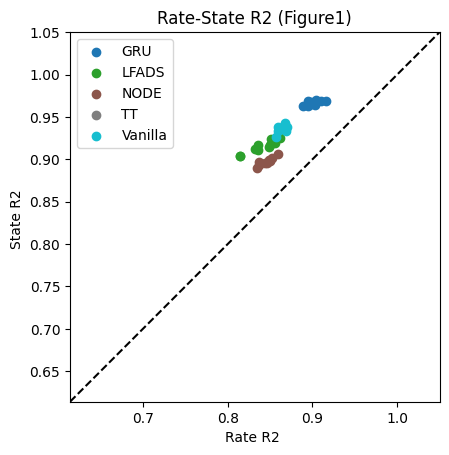

In [4]:
# comparison.compare_performance()
# comparison.compare_CCA(num_components=5)
comparison.compare_state_rate_r2()

(100000, 50)
(100000, 50)
[0.97485002 0.94959642 0.96455136 0.91746894 0.86510602 0.68470881
 0.96561412 0.74873601 0.85905262 0.649454   0.88899948 0.91035884
 0.87499851 0.94649738 0.86124944 0.94156012 0.93022521 0.90927532
 0.95109517 0.97845923 0.85117274 0.92128852 0.97760838 0.92803728
 0.78779564 0.94666837 0.6260196  0.77780171 0.99231222 0.96173015
 0.95371726 0.96421774 0.98957055 0.94196229 0.98605018 0.97149901
 0.90834339 0.9310429  0.95485856 0.94588155 0.98306442 0.93676717
 0.66674126 0.92268634 0.92572699 0.93631049 0.97408099 0.92741027
 0.88565064 0.69989034]


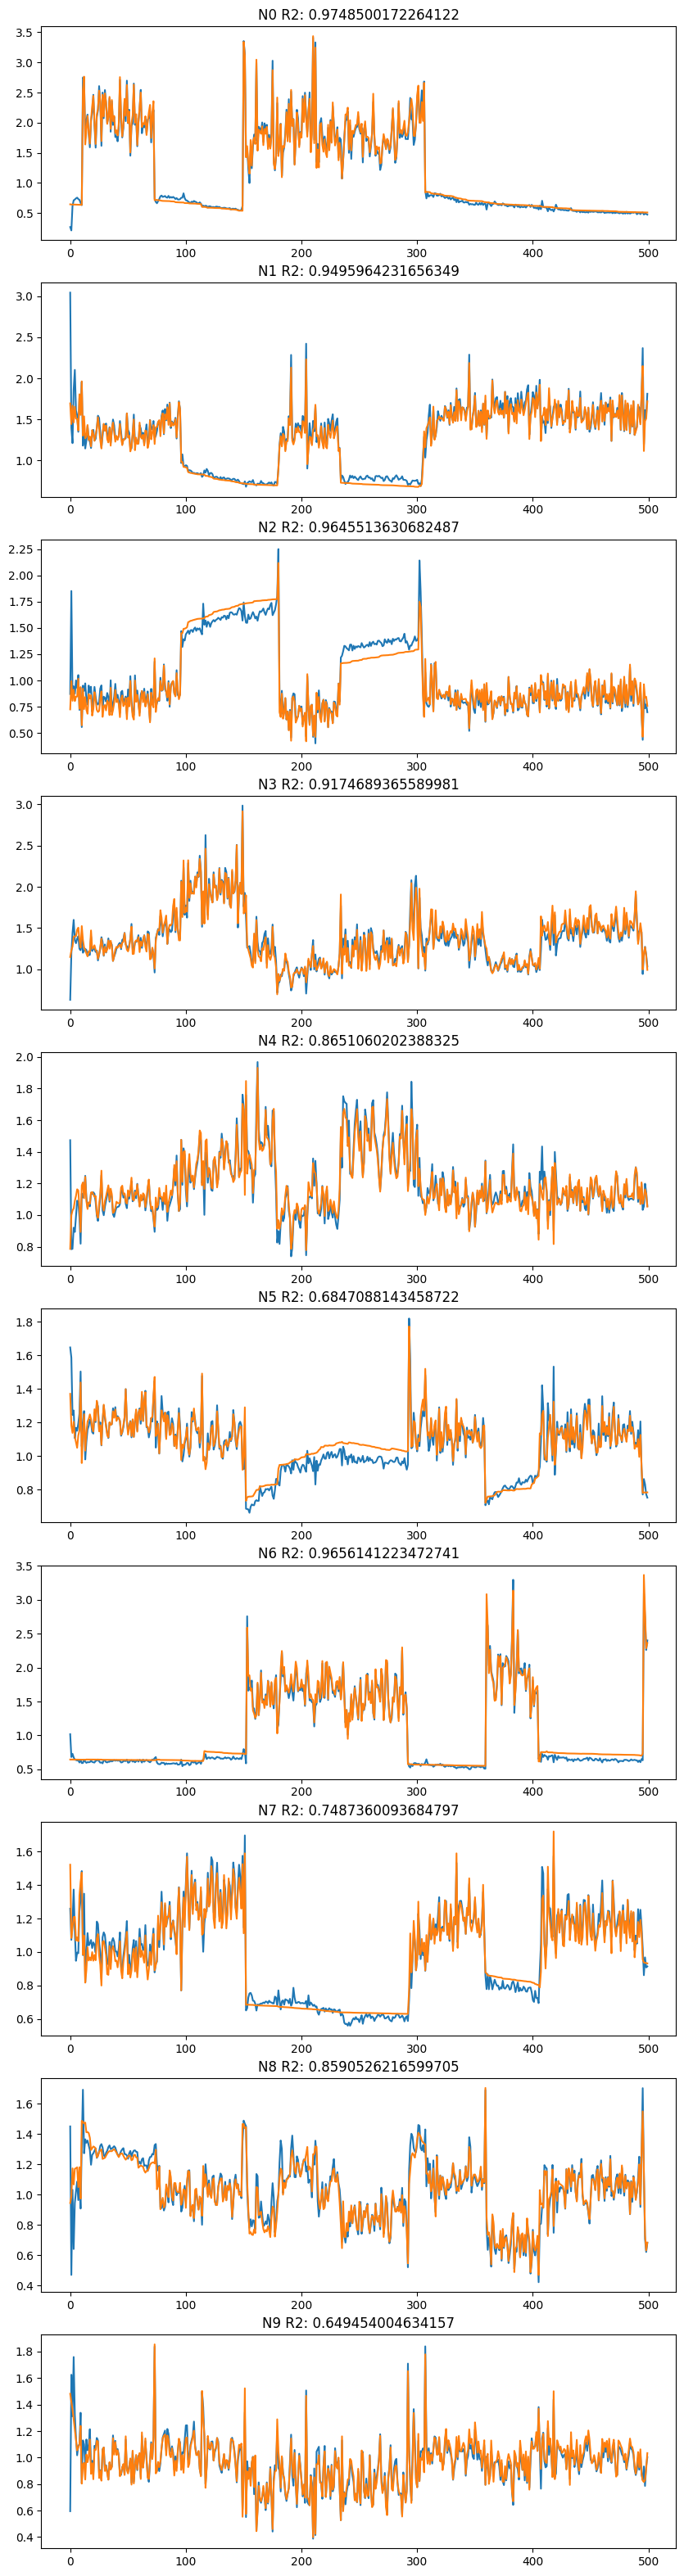

In [19]:
# sims = comparison.compare_dynamics_DSA()

import torch
phase= "val"

rates, latents = comparison.analyses[1].get_model_outputs(phase=phase)
true_rates = comparison.analyses[1].get_true_rates(phase=phase)

from sklearn.metrics import r2_score
tr_np = true_rates.detach().cpu().numpy()
rates_np = rates.detach().cpu().numpy()
tr_np = tr_np.reshape(-1, tr_np.shape[-1])
rates_np = rates_np.reshape(-1, rates_np.shape[-1])
print(tr_np.shape)
print(rates_np.shape)
r2 = r2_score(tr_np, rates_np, multioutput='raw_values')
print(r2)

trial_num= 1
rates_0 = rates[trial_num,:,:].detach().numpy()
latents_0 = latents[trial_num,:,:].detach().numpy()
true_rate_0 = true_rates[trial_num,:,:].detach().numpy()

neurons_to_plot= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig = plt.figure(figsize=( 10,4*len(neurons_to_plot),))
axes = fig.subplots(len(neurons_to_plot))
for i, ax in enumerate(axes):
    ax.plot(rates_0[:, neurons_to_plot[i]], label="Reconstructed")
    ax.plot(true_rate_0[:, neurons_to_plot[i]], label="True")
    ax.set_title(f"N{neurons_to_plot[i]} R2: {r2[neurons_to_plot[i]]}")

In [6]:
# Take upper triangle of sims
# sims = np.triu(sims, k=0)
# sims = sims.flatten()
# self_sim = sims[0]
# sims = sims[1:]
# fig = plt.figure()
# plt.bar(range(len(sims)), sims)
# plt.title("Dynamical Similarity")
# plt.xlabel("Model")
# plt.ylabel("Similarity")
# plt.xticks(range(len(sims)), ["GRU", "Vanilla", "NODE"])    

comparison.compare_to_reference_affine